In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leha-leha/2019.csv
/kaggle/input/leha-leha/2018.csv


In [4]:
import statsmodels.api as sm

# Тесты:

In [6]:
aircraft_model = 1126
date_of_departure = '2019-12-31'
last_day = 10
df = pd.read_csv('/kaggle/input/leha-leha/2019.csv', sep=';')
df['DD'] = pd.to_datetime(df['DD'])

In [5]:
ans = df[(df['FLT_NUM'] == aircraft_model) &
                    (df['DD'] == date_of_departure)]
ans

,SDAT_S,SAK,FLT_NUM,DD,SEG_NUM,SORG,SDST,SSCL1,SEG_CLASS_CODE,NBCL,FCLCLD,PASS_BK,SA,AU,PASS_DEP,NS,DTD
23400649,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,C,J,,0.0,2.0,18.0,20.0,0.0,0.0,284.0
23400650,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,C,C,J,1.0,0.0,0.0,0.0,0.0,0.0,284.0
23400651,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,C,D,C,1.0,0.0,0.0,0.0,0.0,0.0,284.0
23400918,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,C,I,D,1.0,0.0,0.0,0.0,0.0,0.0,284.0
23400919,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,C,Z,I,1.0,0.0,0.0,0.0,0.0,0.0,284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27281702,2019-12-27,SU,1126.0,2019-12-31,1,SVO,AER,C,D,C,0.0,5.0,3.0,16.0,0.0,0.0,4.0
27281703,2019-12-27,SU,1126.0,2019-12-31,1,SVO,AER,C,I,D,0.0,0.0,3.0,16.0,0.0,0.0,4.0
27281704,2019-12-27,SU,1126.0,2019-12-31,1,SVO,AER,C,Z,I,0.0,0.0,1.0,14.0,0.0,0.0,4.0
27281705,2019-12-27,SU,1126.0,2019-12-31,1,SVO,AER,C,O,Z,0.0,4.0,1.0,14.0,0.0,0.0,4.0


In [6]:
pivot_df = ans[['DTD', 'SEG_CLASS_CODE', 'PASS_BK']].pivot_table(index='DTD', columns='SEG_CLASS_CODE', values='PASS_BK', aggfunc='first')

# Сортируем индексы (DTD)
pivot_df = pivot_df.sort_index()

# Выводим таблицу
print(pivot_df)


SEG_CLASS_CODE    B    C    D    E    G     H    I    J    K     L  ...    O  \
DTD                                                                 ...        
-1.0            1.0  1.0  7.0  5.0  0.0  32.0  0.0  5.0  5.0  35.0  ...  5.0   
 0.0            1.0  1.0  7.0  5.0  0.0  32.0  0.0  5.0  5.0  35.0  ...  5.0   
 1.0            1.0  1.0  6.0  5.0  0.0  37.0  0.0  1.0  6.0  36.0  ...  5.0   
 2.0            0.0  1.0  5.0  5.0  0.0  37.0  0.0  1.0  5.0  36.0  ...  5.0   
 3.0            0.0  1.0  5.0  5.0  0.0  37.0  0.0  3.0  6.0  36.0  ...  4.0   
...             ...  ...  ...  ...  ...   ...  ...  ...  ...   ...  ...  ...   
 281.0          0.0  0.0  0.0  0.0  0.0   0.0  0.0  2.0  0.0   0.0  ...  0.0   
 282.0          0.0  0.0  0.0  0.0  0.0   0.0  0.0  2.0  0.0   0.0  ...  0.0   
 283.0          0.0  0.0  0.0  0.0  0.0   0.0  0.0  2.0  0.0   0.0  ...  0.0   
 284.0          0.0  0.0  0.0  0.0  0.0   0.0  0.0  2.0  0.0   0.0  ...  0.0   
 285.0          0.0  0.0  0.0  0.0  0.0 

In [7]:
pivot_df.shape[0] * pivot_df.shape[1], ans.drop_duplicates().shape[0]

(6314, 6314)

In [10]:
ans[(ans['SEG_CLASS_CODE'] == 'H')]

,SDAT_S,SAK,FLT_NUM,DD,SEG_NUM,SORG,SDST,SSCL1,SEG_CLASS_CODE,NBCL,FCLCLD,PASS_BK,SA,AU,PASS_DEP,NS,DTD
23400927,2019-03-22,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,0.0,100.0,100.0,0.0,0.0,284.0
23406446,2019-03-21,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,0.0,100.0,100.0,0.0,0.0,285.0
23412378,2019-03-24,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,0.0,100.0,100.0,0.0,0.0,282.0
23421112,2019-03-23,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,0.0,100.0,100.0,0.0,0.0,283.0
23426364,2019-03-25,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,0.0,100.0,100.0,0.0,0.0,281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27278458,2019-12-30,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,1.0,37.0,0.0,132.0,0.0,0.0,1.0
27279043,2019-12-28,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,1.0,37.0,0.0,132.0,0.0,0.0,3.0
27279199,2019-12-26,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,0.0,34.0,2.0,132.0,0.0,0.0,5.0
27279332,2019-12-29,SU,1126.0,2019-12-31,1,SVO,AER,Y,H,K,1.0,37.0,0.0,132.0,0.0,0.0,2.0


In [11]:
ans.nunique()

SDAT_S            287
SAK                 1
FLT_NUM             1
DD                  1
SEG_NUM             1
SORG                1
SDST                1
SSCL1               2
SEG_CLASS_CODE     22
NBCL               21
FCLCLD              2
PASS_BK            33
SA                141
AU                 80
PASS_DEP            9
NS                  2
DTD               287
dtype: int64

In [ ]:
# SA,

In [98]:
pivot_df

SEG_CLASS_CODE,B,C,D,E,G,H,I,J,K,L,...,O,P,Q,R,T,U,V,X,Y,Z
DTD,,,,,,,,,,,,,,,,,,,,,
-1.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
0.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
1.0,1.0,1.0,6.0,5.0,0.0,37.0,0.0,1.0,6.0,36.0,...,5.0,1.0,31.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
2.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,1.0,5.0,36.0,...,5.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
3.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,3.0,6.0,36.0,...,4.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
! pip install gluonts

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.1 requires shape

In [104]:
!pip install gluonts
!pip install --upgrade mxnet==1.6.0
!pip install "gluonts[torch]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 18.0 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.2
    Uninstalling graphviz-0.20.2:
      Successfully uninstalled graphviz-0.20.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 33.9 MB/s eta 0:00:00
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.2.1
    Uninstalling pytorch-lightning-2.2.1:
      Successfully uninstalled pytorch-lightning-2.2.1


In [106]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName
from gluonts.evaluation.backtest import make_evaluation_predictions
from tqdm.autonotebook import tqdm
from gluonts.evaluation import Evaluator
from typing import Dict

In [ ]:
pivot_df['timestamp_column'] = pd.date_range(start="2022-01-01", periods=pivot_df.shape[0], freq="D")

In [111]:
import pandas as pd
from gluonts.dataset.common import ListDataset
from gluonts.torch.model.deepar import DeepAREstimator

# Предположим, что ваш DataFrame называется df и содержит 12 временных рядов с именами ts1, ts2, ..., ts12
# Загрузим данные в df, их формат должен быть: столбец временных меток (timestamp) и 12 столбцов временных рядов
# Замените "timestamp_column" на имя столбца с временными метками в вашем DataFrame
# Замените "target_columns" на список с именами столбцов временных рядов в вашем DataFrame

timestamp_column = "timestamp_column"
pivot_df['timestamp_column'] = pd.date_range(start="2022-01-01", periods=pivot_df.shape[0], freq="D")
target_columns = pivot_df.drop('timestamp_column', axis=1).columns


# Преобразуем DataFrame в ListDataset
def df_to_list_dataset(df):
    time_series = []
    for _, row in df.iterrows():
        target = row[target_columns].values
        start = row[timestamp_column]
        time_series.append({"target": target, "start": start})
    return ListDataset(time_series, freq="D")

# Загрузим данные в DataFrame
#df = pd.read_csv("your_data.csv")  # Замените "your_data.csv" на путь к вашему файлу данных

# Создадим ListDataset
dataset = df_to_list_dataset(pivot_df.reset_index(drop=True))

# Определим параметры модели DeepAR
estimator = DeepAREstimator(freq="D", prediction_length=7, trainer_kwargs={"max_epochs": 16})

# Обучим модель на данных
predictor = estimator.train(training_data=dataset)


INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type        | Params | In sizes                                                        | Out sizes  
----------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1099, 4], [1, 1099], [1, 1099], [1, 7, 4]] | [1, 100, 7]
----------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached -3.59293 (best -3.59293), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached -5.32536 (best -5.32536), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached -5.49726 (best -5.49726), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO: Epoch 3, global step 200: 'train_loss' was not in top 1
INFO: Epoch 4, global step 250: 'train_loss' reached -5.64484 (best -5.64484), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=4-step=250.ckpt' as top 1
INFO: Epoch 5, global step 300: 'train_loss' reached -5.68481 (best -5.68481), saving model to '/kaggle/working/lightning_logs/version_0/checkpoints/epoch=5-step=300.ckpt' as top 1
INFO: Epoch 6, global step 350: 'tr

In [145]:
target_columns = ['H']
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset,#df_to_list_dataset(pivot_df[['H', 'timestamp_column']].reset_index(drop=True)),
    predictor=predictor,
    num_samples=5,
)

In [146]:
print("Gathering time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(pivot_df)))
print("Gathering time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(pivot_df)))

Gathering time series conditioning values ...


  0%|          | 0/287 [00:00<?, ?it/s]

Gathering time series predictions ...


  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

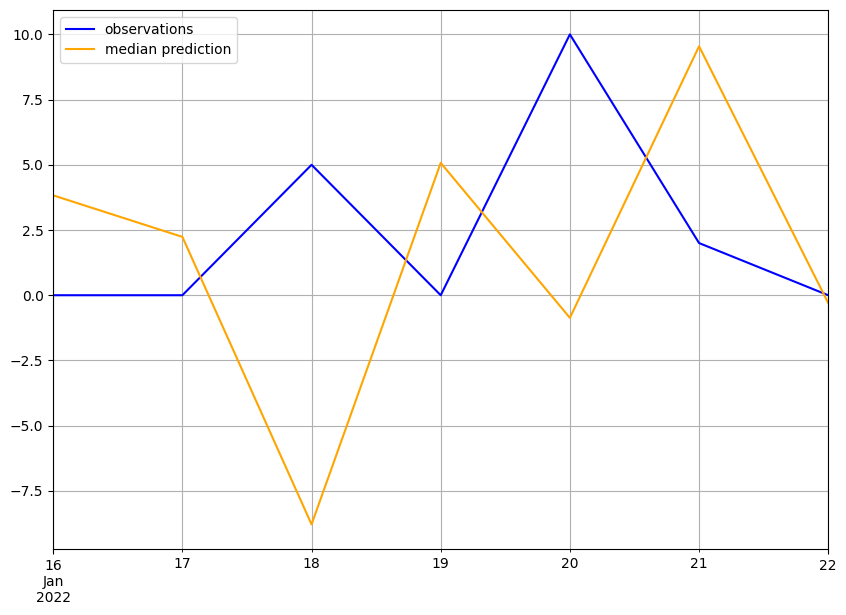

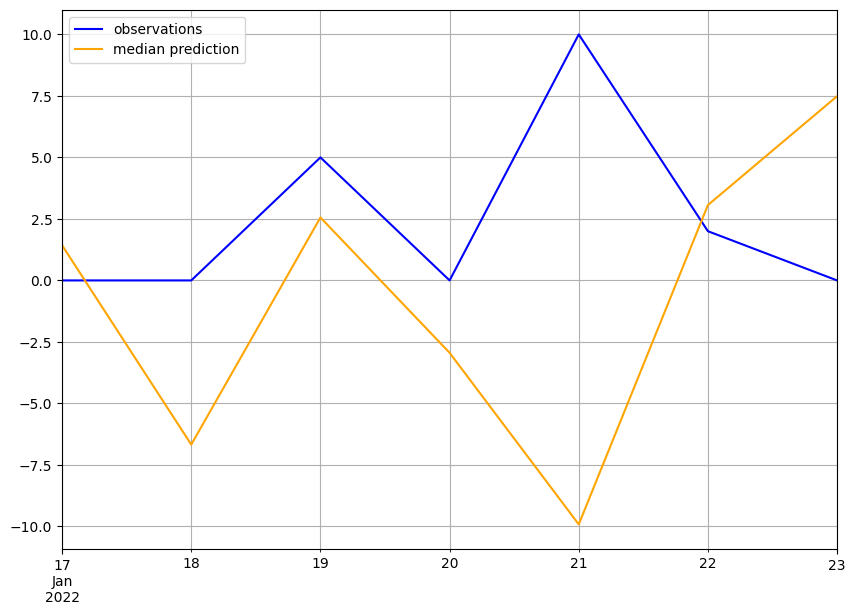

In [148]:
def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 7
    prediction_intervals = (0.5, 0.8)
    legend = ["observations", "median prediction"] + \
        [f"{k*100}% prediction interval" for k in prediction_intervals][::-1]
 
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax, color='blue', label='observations')
 
    # Extract the median prediction
    median = np.median(forecast_entry, axis=0)
    ax.plot(ts_entry.index[-plot_length:], median[-plot_length:],
            color='orange', label='median prediction')
 
    # Extract the prediction intervals if available
    if len(forecast_entry) > 1:
        lower, upper = np.percentile(forecast_entry, q=[(1 - k) * 100 / 2 for k in prediction_intervals], axis=0), np.percentile(
            forecast_entry, q=[(1 + k) * 100 / 2 for k in prediction_intervals], axis=0)
 
        # Ensure lower and upper are 1-D arrays
        lower, upper = lower[-plot_length:], upper[-plot_length:]
 
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()
 
 
for i in tqdm(range(2)):
    ts_entry = tss[i]
    forecast_entry = np.array(forecasts[i].samples)
    plot_prob_forecasts(ts_entry, forecast_entry)

In [141]:
forecasts

[]

In [39]:
#pivot_df.loc[np.arange(last_day, pivot_df.index.max()+1)]
new_pivot_df = pd.DataFrame(columns=pivot_df.columns)
for class_ in pivot_df.columns:
    sarimax = sm.tsa.statespace.SARIMAX(pivot_df.loc[np.arange(last_day, pivot_df.index.max()+1)][class_].iloc[::-1].reset_index(drop=True),exog=None,
                                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    
    new_pivot_df[class_] = sarimax.forecast(last_day + 1)

In [40]:
new_pivot_df

SEG_CLASS_CODE,B,C,D,E,G,H,I,J,K,L,...,O,P,Q,R,T,U,V,X,Y,Z
276,0.0,1.0,0.0,5.050955,0.0,31.000750,0.0,3.003704,5.256410,34.577208,...,2.0,0.833333,32.166221,0.0,0.0,0.0,0.0,10.016325,1.0,0.0
277,0.0,1.0,0.0,5.102430,0.0,33.139534,0.0,3.007412,5.525970,35.164214,...,2.0,0.694444,32.333305,0.0,0.0,0.0,0.0,10.032676,1.0,0.0
278,0.0,1.0,0.0,5.154429,0.0,35.425876,0.0,3.011125,5.809353,35.761187,...,2.0,0.578704,32.501258,0.0,0.0,0.0,0.0,10.049054,1.0,0.0
279,0.0,1.0,0.0,5.206959,0.0,37.869956,0.0,3.014842,6.107268,36.368293,...,2.0,0.482253,32.670082,0.0,0.0,0.0,0.0,10.065459,1.0,0.0
280,0.0,1.0,0.0,5.260023,0.0,40.482656,0.0,3.018564,6.420462,36.985707,...,2.0,0.401878,32.839784,0.0,0.0,0.0,0.0,10.081890,1.0,0.0
281,0.0,1.0,0.0,5.313628,0.0,43.275611,0.0,3.022291,6.749716,37.613602,...,2.0,0.334898,33.010367,0.0,0.0,0.0,0.0,10.098348,1.0,0.0
282,0.0,1.0,0.0,5.367780,0.0,46.261254,0.0,3.026022,7.095855,38.252157,...,2.0,0.279082,33.181836,0.0,0.0,0.0,0.0,10.114834,1.0,0.0
283,0.0,1.0,0.0,5.422484,0.0,49.452882,0.0,3.029758,7.459745,38.901552,...,2.0,0.232568,33.354196,0.0,0.0,0.0,0.0,10.131346,1.0,0.0
284,0.0,1.0,0.0,5.477745,0.0,52.864704,0.0,3.033498,7.842296,39.561972,...,2.0,0.193807,33.527452,0.0,0.0,0.0,0.0,10.147885,1.0,0.0
285,0.0,1.0,0.0,5.533569,0.0,56.511913,0.0,3.037243,8.244465,40.233603,...,2.0,0.161506,33.701607,0.0,0.0,0.0,0.0,10.164451,1.0,0.0


In [41]:
pivot_df

SEG_CLASS_CODE,B,C,D,E,G,H,I,J,K,L,...,O,P,Q,R,T,U,V,X,Y,Z
DTD,,,,,,,,,,,,,,,,,,,,,
-1.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
0.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
1.0,1.0,1.0,6.0,5.0,0.0,37.0,0.0,1.0,6.0,36.0,...,5.0,1.0,31.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
2.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,1.0,5.0,36.0,...,5.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
3.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,3.0,6.0,36.0,...,4.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# их фичи вставить адекватно
# forecast вставляем в табличку но сначсала в переменную чтобы потом туда ансамбль или анализ вставить

In [ ]:
pivot_df.iloc[::-1]

In [95]:
#pivot_df.sum(axis=1)
sarimax = sm.tsa.statespace.SARIMAX(np.array(pivot_df.sum(axis=1))[::-1],exog=np.array(last_day)[::-1],
                                enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
    
all_pred = sarimax.predict()

In [97]:
all_pred

array([  0.        ,   0.        ,   1.72046799,   2.03667865,
         2.03667865,   2.03667865,   2.03667865,   2.03667865,
         2.03667865,   2.03667865,   2.03667865,   2.03667865,
         2.03667865,   2.03667865,   2.03667865,   2.03667865,
         2.03667865,   2.03667865,   2.03667865,   2.03667865,
         2.03667865,   2.03667865,   2.03667865,   2.03667865,
         2.03667865,   2.89691264,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05501797,
         3.05501797,   3.05501797,   3.05501797,   3.05

In [93]:
pivot_df

SEG_CLASS_CODE,B,C,D,E,G,H,I,J,K,L,...,O,P,Q,R,T,U,V,X,Y,Z
DTD,,,,,,,,,,,,,,,,,,,,,
-1.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
0.0,1.0,1.0,7.0,5.0,0.0,32.0,0.0,5.0,5.0,35.0,...,5.0,1.0,30.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
1.0,1.0,1.0,6.0,5.0,0.0,37.0,0.0,1.0,6.0,36.0,...,5.0,1.0,31.0,0.0,0.0,5.0,0.0,10.0,2.0,0.0
2.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,1.0,5.0,36.0,...,5.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
3.0,0.0,1.0,5.0,5.0,0.0,37.0,0.0,3.0,6.0,36.0,...,4.0,1.0,32.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
sarimax.predict(15)[2]

117.86821274138022

In [83]:
last_day = pivot_df.sum(axis=1).iloc[1:]
last_day.loc[last_day.shape[0]] = 0

In [79]:
np.array(last_day)

DTD
0.0      145.0
1.0      151.0
2.0      144.0
3.0      146.0
4.0      142.0
         ...  
281.0      2.0
282.0      2.0
283.0      2.0
284.0      2.0
285.0      0.0
Length: 286, dtype: float64

In [47]:
all_pred.iloc[::-1], pivot_df.sum(axis=1).iloc[:last_day+1]

(286    152.973386
 285    150.299388
 284    147.672132
 283    145.090801
 282    142.554592
 281    140.062717
 280    137.614399
 279    135.208879
 278    132.845408
 277    130.523250
 276    128.241684
 Name: predicted_mean, dtype: float64,
 DTD
 -1.0    145.0
  0.0    145.0
  1.0    151.0
  2.0    144.0
  3.0    146.0
  4.0    142.0
  5.0    144.0
  6.0    142.0
  7.0    137.0
  8.0    134.0
  9.0    126.0
 dtype: float64)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Предположим, что у вас есть данные X_train, y_train, X_test, y_test

# Определение модели LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Предположим, что вы предсказываете одно значение

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


In [51]:
to_lstm = ans.drop_duplicates(subset=['DTD', 'SEG_CLASS_CODE'])

In [63]:
to_lstm2 = ans.drop_duplicates(subset=['DTD', 'SEG_CLASS_CODE'])
to_lstm2 = to_lstm2[to_lstm2['SEG_CLASS_CODE'] == 'Q']
X2 = to_lstm2[['SA', 'PASS_BK', 'DTD']].sort_values(by='DTD').drop('DTD', axis=1)
X_train2 = X2.iloc[10:]
X_test2 = X2.iloc[:10]

In [54]:
to_lstm = to_lstm[to_lstm['SEG_CLASS_CODE'] == 'L']

In [59]:
X = to_lstm[['SA', 'PASS_BK', 'DTD']].sort_values(by='DTD').drop('DTD', axis=1)

In [61]:
X_train = X.iloc[10:]
X_test = X.iloc[:10]

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Предположим, что у вас есть данные X_train, представленные как временные ряды до дня N

# Определение модели LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=2))  # Выходной слой с двумя нейронами, по одному на каждый ряд

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train, X_train, epochs=5, batch_size=32)

# Делаем предсказание для данных после дня N
predicted_values = model.predict(X_test)


2024-03-22 17:01:08.640228: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 17:01:08.640437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 17:01:08.800616: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


IndexError: tuple index out of range

In [65]:
X_train_combined = np.vstack([X_train, X_train2])

In [69]:
X_train

,SA,PASS_BK
27233021,0.0,34.0
27244475,0.0,34.0
27227966,0.0,34.0
27221996,0.0,34.0
27222237,0.0,34.0
...,...,...
23426365,72.0,0.0
23412379,72.0,0.0
23421113,72.0,0.0
23400928,72.0,0.0


In [68]:
X_train_combined

array([[ 0., 34.],
       [ 0., 34.],
       [ 0., 34.],
       ...,
       [21.,  0.],
       [21.,  0.],
       [21.,  0.]])

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Предположим, что у вас есть X_train в формате numpy array с размерностью (samples, features)
# где samples - количество примеров, features - количество признаков

# Преобразуем X_train в форму (samples, timesteps, features)
timesteps = 10  # количество временных шагов
features = 2    # количество признаков
samples = X_train.shape[0] - timesteps + 1  # учитываем, что у нас нет меток y_train

X_train_reshaped = np.zeros((samples, timesteps, features))
for i in range(samples):
    X_train_reshaped[i] = X_train[i:i+timesteps]

# Создаем модель LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Компилируем модель
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель
model.fit(X_train_reshaped, X_train[timesteps-1:], epochs=100, batch_size=32)  # Используем X_train как метки

# Делаем предсказание на 5 дней вперёд
future_prediction = []
current_sample = X_train_reshaped[-1]  # Берем последний сэмпл из обучающего набора

for _ in range(5):  # Предсказываем на 5 дней вперёд
    prediction = model.predict(current_sample.reshape(1, X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    future_prediction.append(prediction)
    current_sample = np.append(current_sample[1:], prediction, axis=0)  # Обновляем текущий сэмпл

future_prediction = np.array(future_prediction)

# Выводим предсказания
print("Предсказания на 5 дней вперёд:")
print(future_prediction)


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2387.0142
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2167.7693
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2128.8816
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1965.5710
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1887.2137
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1748.4543
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1796.5677
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1728.6589
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1713.6245
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1682.9523
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1631.7361
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1650.7040
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1685.7161
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1621.7341
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1553.0914

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2287.8174
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2250.4937
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2112.9553
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1998.3827
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1975.7098
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1928.1743
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1837.8333
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1811.4271
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1826.0631
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1718.3016
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 1

In [74]:
sarimax.save("SARIMAX_results.pickle")

In [1]:
df

NameError: name 'df' is not defined

In [ ]:
e